In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('diabetes_dataset.csv')

In [4]:
data

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,...,60.3,88.7,19.1,6.1,Low,3582,NaN,Former,1,1
9996,9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,...,72.3,200.0,37.1,3.5,Low,2206,NaN,Never,1,1
9997,9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,...,69.8,156.1,85.8,4.9,High,3175,Heavy,Former,1,1
9998,9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,...,74.2,110.9,25.3,5.2,High,3478,Moderate,Never,1,0


In [5]:
data.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [6]:
data.shape

(10000, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

In [8]:
mode_alcohol = data['Alcohol_Consumption'].mode()[0]
data['Alcohol_Consumption'] = data['Alcohol_Consumption'].apply(lambda x: mode_alcohol if pd.isnull(x) else x)

In [9]:
data.isnull().sum()

Unnamed: 0                       0
Age                              0
Sex                              0
Ethnicity                        0
BMI                              0
Waist_Circumference              0
Fasting_Blood_Glucose            0
HbA1c                            0
Blood_Pressure_Systolic          0
Blood_Pressure_Diastolic         0
Cholesterol_Total                0
Cholesterol_HDL                  0
Cholesterol_LDL                  0
GGT                              0
Serum_Urate                      0
Physical_Activity_Level          0
Dietary_Intake_Calories          0
Alcohol_Consumption              0
Smoking_Status                   0
Family_History_of_Diabetes       0
Previous_Gestational_Diabetes    0
dtype: int64

In [10]:
data.describe()

,Unnamed: 0,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,44.620400,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,2742.481900,0.507000,0.516500
std,2886.89568,14.343489,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,716.643803,0.499976,0.499753
min,0.00000,20.000000,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,1500.000000,0.000000,0.000000
25%,2499.75000,32.000000,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,2129.000000,0.000000,0.000000
50%,4999.50000,45.000000,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,2727.000000,1.000000,1.000000
75%,7499.25000,57.000000,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,3368.000000,1.000000,1.000000
max,9999.00000,69.000000,40.000000,120.00000,200.000000,15.000000,179.000000,119.000000,300.000000,80.000000,200.00000,100.00000,8.000000,3999.000000,1.000000,1.000000


In [11]:
data.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [12]:
data['diabetes']=(data['Fasting_Blood_Glucose']>=126).astype(int)

In [13]:
data

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,0
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,...,88.7,19.1,6.1,Low,3582,Moderate,Former,1,1,0
9996,9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,...,200.0,37.1,3.5,Low,2206,Moderate,Never,1,1,0
9997,9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,...,156.1,85.8,4.9,High,3175,Heavy,Former,1,1,0
9998,9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,...,110.9,25.3,5.2,High,3478,Moderate,Never,1,0,0


In [14]:
data['diabetes'].value_counts()

diabetes
1    5671
0    4329
Name: count, dtype: int64

In [15]:
data.drop(columns='Unnamed: 0', inplace=True)

In [17]:
data.head()

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,...,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,0
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,...,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,...,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,...,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,...,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1


In [18]:
data.diabetes.value_counts()

diabetes
1    5671
0    4329
Name: count, dtype: int64

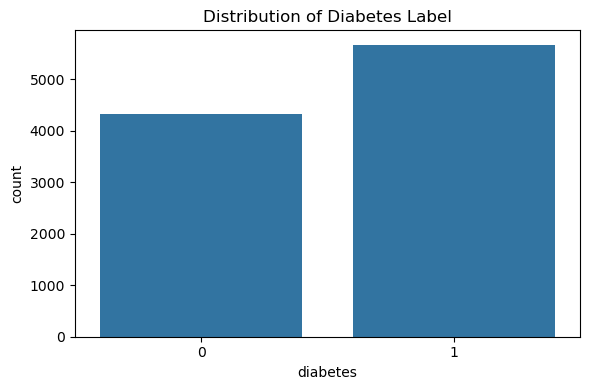

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=data)
plt.title('Distribution of Diabetes Label')
plt.tight_layout()
plt.show()

In [20]:
data.columns

Index(['Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level',
       'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes',
       'diabetes'],
      dtype='object')

In [50]:
numerical_cols=data.select_dtypes(include=['float64','int64']).columns
categorical_cols=data.select_dtypes(include=['object']).columns

In [52]:
numerical_cols

Index(['Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'HbA1c',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL', 'GGT',
       'Serum_Urate', 'Dietary_Intake_Calories', 'Family_History_of_Diabetes',
       'Previous_Gestational_Diabetes'],
      dtype='object')

In [54]:
categorical_cols

Index(['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption',
       'Smoking_Status'],
      dtype='object')

In [56]:
data.head()

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,...,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,0
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,...,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,...,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,...,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,...,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1


In [58]:
data.isna().sum()

Age                              0
Sex                              0
Ethnicity                        0
BMI                              0
Waist_Circumference              0
Fasting_Blood_Glucose            0
HbA1c                            0
Blood_Pressure_Systolic          0
Blood_Pressure_Diastolic         0
Cholesterol_Total                0
Cholesterol_HDL                  0
Cholesterol_LDL                  0
GGT                              0
Serum_Urate                      0
Physical_Activity_Level          0
Dietary_Intake_Calories          0
Alcohol_Consumption              0
Smoking_Status                   0
Family_History_of_Diabetes       0
Previous_Gestational_Diabetes    0
diabetes                         0
dtype: int64

In [80]:
X=data.drop(columns=['diabetes'])
Y=data['diabetes']

In [82]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [84]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((7500, 20), (7500,), (2500, 20), (2500,))

In [86]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

In [88]:
Logistic_Pipe=Pipeline(
    steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
    ]
)

In [90]:
Logistic_Pipe.fit(X_train,Y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'HbA1c',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL', 'GGT',
       'Serum_Urate', 'Dietary_Intake_Calories', 'Family_History_of_Diabetes',
       'Previous_Gestational_Diabetes'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption',
       'Smoking_Status'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [100]:
accuracy = Logistic_Pipe.score(X_train, Y_train)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 99.83%


In [102]:
accuracy = Logistic_Pipe.score(X_test, Y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 99.52%
